<a href="https://colab.research.google.com/github/aksanaboo/AntibioticsUsage/blob/main/AntibioticsUsage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install vizro

In [11]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import vizro.plotly.express as px
from vizro import Vizro
import vizro.models as vm

In [16]:
#dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hospital Dataset.csv')

In [17]:
data.head()

,Age,Date of Data Entry,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
0,85,19/12/2019 14:41:49,Female,"ccf, hypertension, ida, ckd(stage 5), ?icm,",ceftriaxone,1,IV,BD,7,icm
1,87,19/12/2019 16:35:25,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1,IV,BD,1,post op
2,82,19/12/2019 15:48:49,Male,"type-2dm, ihd, col, copd, ht",ofloxacin,0.4,IV,BD,3,abd distension with leg swelling
3,82,19/12/2019 15:50:33,Male,"type-2 dm, ihd, col, copd, ht",cefipime,1,IV,BD,5,abd distension with leg swelling
4,82,19/12/2019 15:52:20,Male,"type-2 dm, ihd, col, copd, ht",azithromycin,0.5,Oral,OD,3,abd distension with leg swelling


In [18]:
data.columns

Index(['Age', 'Date of Data Entry', 'Gender', 'Diagnosis', 'Name of Drug',
       'Dosage (gram)', 'Route', 'Frequency', 'Duration (days)', 'Indication'],
      dtype='object')

The dataset focuses on the retrospective study of the usage of antibiotics and diseases under the title of antibiotics resistance. The dataset contains

- age and gender of the patient

- diagnosis of the patient

- Antibiotics used to treat patient

- Dosage of the antibiotics in grams

- Route of application of antibiotics

- Frequency of usage of antibiotics

- Duration of treatment using antibiotics in days

- Indiction of antibiotics

In [39]:
# checking for missing values
data.isnull().sum()

Age                   0
Date of Data Entry    0
Gender                0
Diagnosis             0
Name of Drug          0
Dosage (gram)         0
Route                 0
Frequency             0
Duration (days)       0
Indication            1
dtype: int64

In [40]:
data.dropna(inplace=True)

In [38]:
data.duplicated().sum()

7

In [41]:
data.drop_duplicates(inplace=True)

In [42]:
#Antibiotics used overview
top_10_drug = data['Name of Drug'].value_counts().reset_index()[:10]

In [43]:
top_10_drug.rename(columns={'index':'Drug','Name of Drug':'Count'},inplace=True)

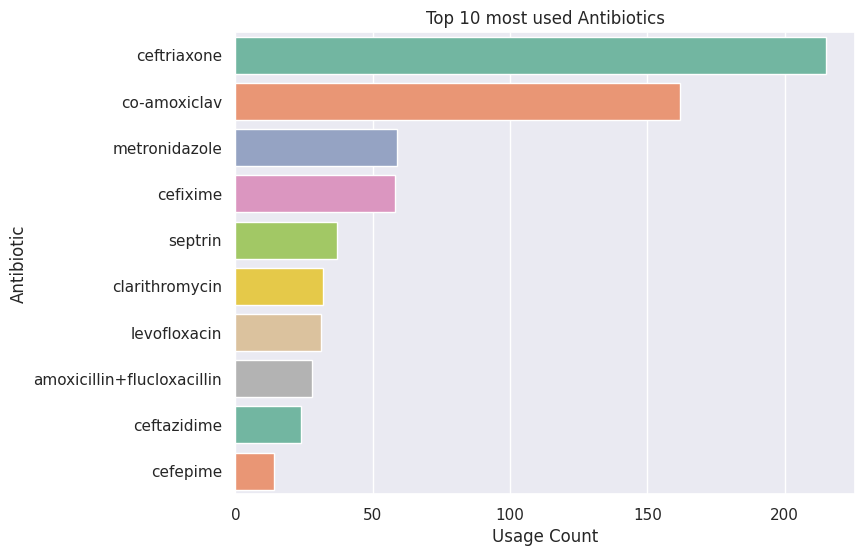

In [44]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(data=top_10_drug,x='Count',y='Drug',palette='Set2')
plt.xlabel('Usage Count')
plt.ylabel('Antibiotic')
plt.title('Top 10 most used Antibiotics')
plt.show()

In [45]:
data.Gender.value_counts()

Male      448
Female    375
Sex         2
Name: Gender, dtype: int64

In [46]:
data = data[data['Gender'] != 'Sex']

In [60]:
data['Age'] = data['Age'].astype(int)

<ipython-input-63-3aa1748af528>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels())


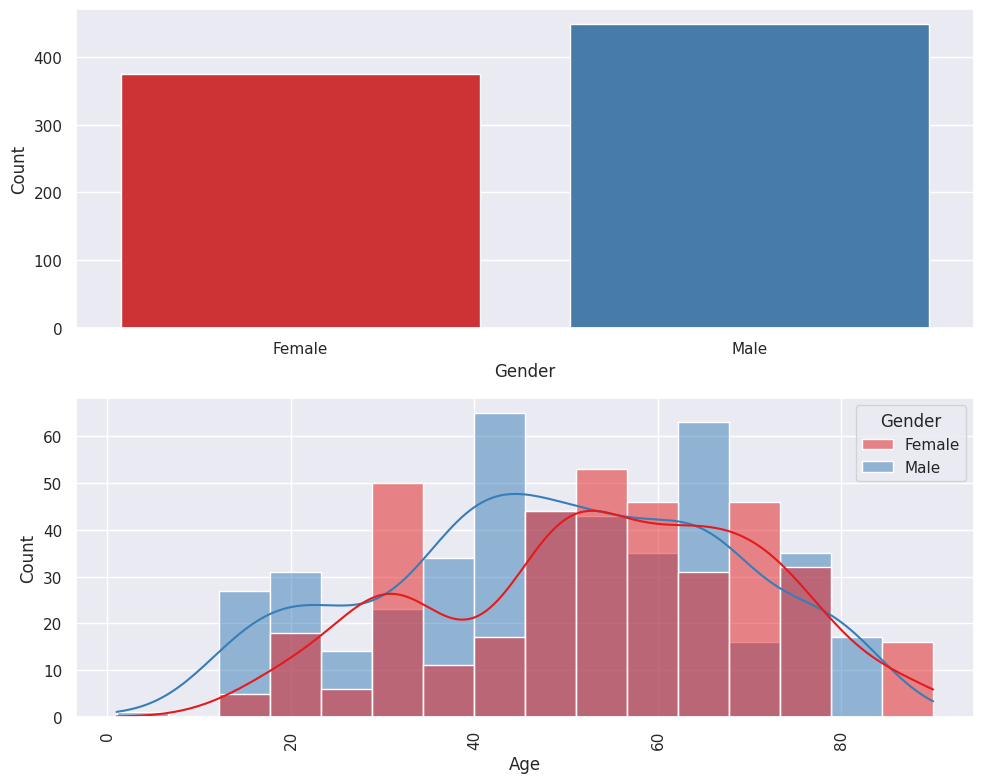

In [63]:
# Age and Gender distribution
fig, axes = plt.subplots(2,1,figsize=(10, 8))

# first subplot - Gender distribution
sns.set(style='darkgrid')
sns.countplot(data=data,x='Gender',palette='Set1',ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels())

# second subplot - Age distribution with male-female ratio
age_bins = [20, 30, 40, 50, 60, 70, 80]  # Define your age bins here
data['Age Group'] = pd.cut(data['Age'], bins=age_bins)
sns.set(style='darkgrid')
sns.histplot(data=data,x='Age', hue='Gender', palette='Set1', kde='True', ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels())

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()